In [ ]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [53]:
api_wrapper_wikipedia=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wikipedia=WikipediaQueryRun(api_wrapper=api_wrapper_wikipedia)

In [54]:
wikipedia.invoke("what is Agentic AI??")

'Page: Agentic AI\nSummary: Agentic AI is a class of artificial intelligence that focuses on autonomous systems that can make decisions and perform tasks without human intervention. The independent systems automatically respond to conditions, to produce process results. The field is closely linked to agentic automation, also known as agent-based process management systems, when applied to process automation. Applications include software development, customer support, cybersecurity and business in'

In [55]:
from langchain_community.tools import ArxivQueryRun
from langchain_community.utilities import ArxivAPIWrapper

In [56]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)

In [57]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [58]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

In [59]:
from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI
llm=ChatGroq(model="llama-3.1-8b-instant")
llm1=ChatOpenAI(model="gpt-5")

In [60]:
llm.invoke("hey LLM, welcome to our AgenticAI space")

AIMessage(content="Nice to be here. I'm excited to explore the AgenticAI space with you. As a Large Language Model, I'm designed to learn, adapt, and interact with users in a dynamic environment. I'm ready to engage in conversations, answer questions, and learn from your experiences.\n\nBefore we dive in, I'd like to clarify that AgenticAI is a relatively new and emerging field. As such, I'd love to learn more about your specific focus and goals within this space. Are you working on projects related to artificial general intelligence, cognitive architectures, or perhaps human-AI collaboration?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 121, 'prompt_tokens': 46, 'total_tokens': 167, 'completion_time': 0.297648168, 'prompt_time': 0.013074206, 'queue_time': 0.953974425, 'total_time': 0.310722374}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_2a85b31419', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run

In [61]:
llm1.invoke("hey LLM, welcome to our AgenticAI space")

AIMessage(content='Thanks for the warm welcome! Excited to help. What are you building, and how can I plug in today?\n\nI can help with:\n- Agent architecture: goals, tools/actions, memory, planning/critique loops\n- Prompts and system instructions tailored to tasks and safety\n- Tool/action specs: input/output schemas, validation, permissions\n- Retrieval setup: indexing, chunking, reranking, grounding strategies\n- Code scaffolding: Python/JS agent skeletons, SDK stubs, handlers\n- Evaluation & observability: test cases, traces, metrics, regression harness\n- Safety/guardrails: policy design, red-teaming, data privacy\n- Cost/latency tuning: batching, caching, model routing\n\nShare a bit about:\n1) Your primary use case and target users\n2) Tech stack and available tools/APIs\n3) Constraints (latency, budget, privacy/compliance)\n\nIf you want, I can start by proposing a minimal agent template or an evaluation plan.', additional_kwargs={'refusal': None}, response_metadata={'token_us

In [62]:
from langchain_tavily import TavilySearch
tavily=TavilySearch()

In [63]:
tavily.invoke("what is AI Today?? how we can see future with AI?")

{'query': 'what is AI Today?? how we can see future with AI?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://builtin.com/artificial-intelligence/artificial-intelligence-future',
   'title': 'The Future of AI: How AI Is Changing the World',
   'content': 'AI is already powering automation and data analysis. In the future, expect widespread adoption of autonomous machinery and AI-powered personalization.',
   'score': 0.657561,
   'raw_content': None},
  {'url': 'https://today.ucsd.edu/story/the-future-of-ai-is-now',
   'title': 'The Future of AI is Now',
   'content': 'From ChatGPT to facial recognition, self-driving cars and virtual assistants such as Alexa and Siri, AI is already a part of our everyday lives.',
   'score': 0.529191,
   'raw_content': None},
  {'url': 'https://www.hiig.de/en/why-ai-is-currently-mainly-predicting-the-past/',
   'title': 'Why AI is currently mainly predicting the past',
   'content': 'While AI is seen as tech

In [64]:
def add(a:int,b:int)->int:
    '''add the two numbers

    args:
        a: is the first variable to store the first int
        b: is the second vraiable to store the second int

    return addition of two numbers
    '''
    return a+b

In [65]:
add(3,3)

6

In [66]:
def mult(a:int,b:int)->int:
    '''multiply two numbers 
    args:
        a:is the first variable to store the first number 
        b:is the second variable to store second number

    return  
        mulitply given given two numbers ok
    '''
    return a*b

In [67]:
mult(3,6)

18

In [68]:
def dev(a:int,b:int)->int:
    '''divide two numbers 
    args:
        a:is the first variable to store the first number 
        b:is the second variable to store second number

    return  
        divide given given two numbers ok
    '''
    return a/b

In [69]:
dev(4,7)

0.5714285714285714

In [70]:
tools=[dev,mult,add,tavily,arxiv,wikipedia]

In [71]:
llm_with_tool=llm.bind_tools(tools)

In [72]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage,AIMessage,HumanMessage

In [73]:
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [74]:
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

In [75]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [76]:
graph=StateGraph(State)

In [77]:
graph.add_node("tool_calling_llm",tool_calling_llm)
graph.add_node("tools",ToolNode(tools))

In [78]:
graph.add_edge(START,"tool_calling_llm")
graph.add_conditional_edges("tool_calling_llm",tools_condition)
graph.add_edge("tools","tool_calling_llm")

In [79]:
build_graph=graph.compile()

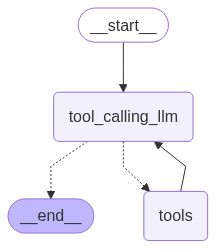

In [80]:
display(Image(build_graph.get_graph().draw_mermaid_png()))

In [ ]:
build_graph.invoke({'messages':[HumanMessage(content="what is Todays AI news dated 12th August")]})

{'messages': [HumanMessage(content='what is Todays AI news dated 12th August', additional_kwargs={}, response_metadata={}, id='82fdac49-d140-412d-99b5-c2615bc60218'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'cbq3vpzq4', 'function': {'arguments': '{"query":"AI news 12th August","search_depth":"advanced","time_range":"day","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 2446, 'total_tokens': 2487, 'completion_time': 0.069346163, 'prompt_time': 0.085781795, 'queue_time': 0.046238453, 'total_time': 0.155127958, 'prompt_tokens_details': {'cached_tokens': 2048}}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c8fb515de2', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a1ddee2a-780e-414f-8d6f-93a960b0d557-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'AI news 12th August', 'search_depth': 'advanced', 't

In [86]:
build_graph.invoke({'messages':[HumanMessage(content="what is ML??")]})

{'messages': [HumanMessage(content='what is ML??', additional_kwargs={}, response_metadata={}, id='a5b9f9c0-f65b-4606-a57a-b7bb81076101'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'hs6cde1ja', 'function': {'arguments': '{"query":"Machine Learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 2439, 'total_tokens': 2454, 'completion_time': 0.018013819, 'prompt_time': 0.242530844, 'queue_time': 0.046711145, 'total_time': 0.260544663}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_2a85b31419', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a807273d-3273-4e50-84a0-c11de291c06f-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine Learning'}, 'id': 'hs6cde1ja', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2439, 'output_tokens': 15, 'total_tokens': 2454}),
  ToolMessage(content='Page: Machine learning\nSummary: 

In [89]:
build_graph.invoke({'messages':HumanMessage(content="Attention is All you need")})

{'messages': [HumanMessage(content='Attention is All you need', additional_kwargs={}, response_metadata={}, id='3c338995-546a-4152-9400-e7b78c7deebf'),
  AIMessage(content='<wikipedia>{"query": "Attention Is All You Need"} </wikipedia>\n\n<arxiv>{"query": "Attention Is All You Need"} </arxiv>\n\n<tavily_search>{"query": "Attention Is All You Need", "topic": "general"} </tavily_search>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 60, 'prompt_tokens': 2440, 'total_tokens': 2500, 'completion_time': 0.099242408, 'prompt_time': 0.211033689, 'queue_time': 0.046059922, 'total_time': 0.310276097}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c8fb515de2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--b7b50213-f7bb-443a-845b-ae642360cb23-0', usage_metadata={'input_tokens': 2440, 'output_tokens': 60, 'total_tokens': 2500})]}

In [90]:
build_graph.invoke({'messages':HumanMessage(content="what is two plus nine")})

{'messages': [HumanMessage(content='what is two plus nine', additional_kwargs={}, response_metadata={}, id='aed4f919-bf1f-4d51-9886-c38a57c247d0'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'hqnfe9r69', 'function': {'arguments': '{"a":2,"b":9}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 2440, 'total_tokens': 2458, 'completion_time': 0.03853884, 'prompt_time': 0.116981347, 'queue_time': 0.046805169, 'total_time': 0.155520187, 'prompt_tokens_details': {'cached_tokens': 1024}}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c8fb515de2', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--752afb43-985c-449d-996a-4e39d12eb400-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 9}, 'id': 'hqnfe9r69', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2440, 'output_tokens': 18, 'total_tokens': 2458}),
  ToolMessage(content='11', name='add'

In [91]:
build_graph.invoke({'messages':[HumanMessage(content="what is two plus nine")]})

{'messages': [HumanMessage(content='what is two plus nine', additional_kwargs={}, response_metadata={}, id='ff98986f-c91b-4107-bc7a-6395ec4a5f79'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '68b0y21rk', 'function': {'arguments': '{"a":2,"b":9}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 2440, 'total_tokens': 2458, 'completion_time': 0.037764232, 'prompt_time': 0.089393407, 'queue_time': 0.045253818, 'total_time': 0.127157639, 'prompt_tokens_details': {'cached_tokens': 2048}}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c8fb515de2', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1601dc96-37a6-480d-9102-223a7937a5d6-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 9}, 'id': '68b0y21rk', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2440, 'output_tokens': 18, 'total_tokens': 2458}),
  ToolMessage(content='11', name='add

In [92]:
from pprint import pprint

In [94]:
msg=build_graph.invoke({'messages':HumanMessage(content="what is two plus nine")})
for m in msg["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is two plus nine
================================== Ai Message ==================================
Tool Calls:
  add (zh6qq3c5g)
 Call ID: zh6qq3c5g
  Args:
    a: 2
    b: 9
================================= Tool Message =================================
Name: add

11
================================== Ai Message ==================================

The result of the function call is 11.


In [95]:
msg=build_graph.invoke({'messages':HumanMessage(content="what is Attention is all you need")})
for m in msg["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is Attention is all you need
================================== Ai Message ==================================
Tool Calls:
  wikipedia (20rjtenbc)
 Call ID: 20rjtenbc
  Args:
    query: Attention is all you need paper abstract
  arxiv (xrm836s15)
 Call ID: xrm836s15
  Args:
    query: Attention is all you need
================================= Tool Message =================================
Name: wikipedia

Page: Attention (machine learning)
Summary: In machine learning, attention is a method that determines the importance of each component in a sequence relative to the other components in that sequence. In natural language processing, importance is represented by "soft" weights assigned to each word in a sentence. More generally, attention encodes vectors called token embeddings across a fixed-width sequence that can range from tens to millions of tokens in size.
Unlike "hard" weights, which are c
===